In [ ]:
pip install findspark


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [75]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
cols = ['sentiment','id','date','query_string','user','text']
df = pd.read_csv('training.1600000.processed.noemoticon.csv',header=None, names=cols,encoding='latin-1')
df.head()

,sentiment,id,date,query_string,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [73]:
df.sentiment.value_counts()

0    800000
1    800000
Name: sentiment, dtype: int64

In [76]:
df.drop(['id','date','query_string','user'],axis=1,inplace=True)

In [77]:
df[df.sentiment == 0].head(10)

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
5,0,@Kwesidei not the whole crew
6,0,Need a hug
7,0,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,@Tatiana_K nope they didn't have it
9,0,@twittera que me muera ?


In [78]:
df[df.sentiment == 4].head(10)

,sentiment,text
800000,4,I LOVE @Health4UandPets u guys r the best!!
800001,4,im meeting up with one of my besties tonight! ...
800002,4,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,4,Being sick can be really cheap when it hurts t...
800004,4,@LovesBrooklyn2 he has that effect on everyone
800005,4,@ProductOfFear You can tell him that I just bu...
800006,4,@r_keith_hill Thans for your response. Ihad al...
800007,4,"@KeepinUpWKris I am so jealous, hope you had a..."
800008,4,"@tommcfly ah, congrats mr fletcher for finally..."
800009,4,@e4VoIP I RESPONDED Stupid cat is helping me ...


In [79]:
df['pre_clean_len'] = [len(t) for t in df.text]

In [80]:
from pprint import pprint
data_dict = {
    'sentiment':{
        'type':df.sentiment.dtype,
        'description':'sentiment class - 0:negative, 1:positive'
    },
    'text':{
        'type':df.text.dtype,
        'description':'tweet text'
    },
    'pre_clean_len':{
        'type':df.pre_clean_len.dtype,
        'description':'Length of the tweet before cleaning'
    },
    'dataset_shape':df.shape
}
pprint(data_dict)

{'dataset_shape': (1600000, 3),
 'pre_clean_len': {'description': 'Length of the tweet before cleaning',
                   'type': dtype('int64')},
 'sentiment': {'description': 'sentiment class - 0:negative, 1:positive',
               'type': dtype('int64')},
 'text': {'description': 'tweet text', 'type': dtype('O')}}


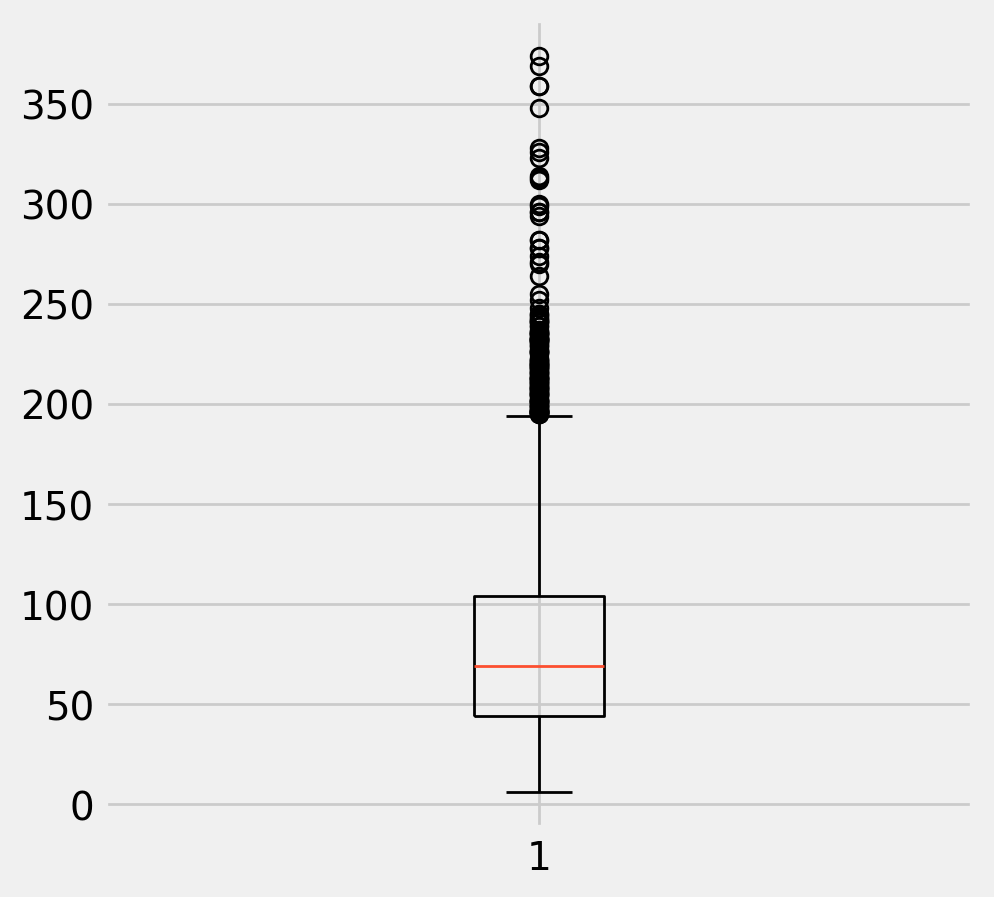

In [81]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df.pre_clean_len)
plt.show()

In [82]:
df[df.pre_clean_len > 140].head(10)

,sentiment,text,pre_clean_len
213,0,Awwh babs... you look so sad underneith that s...,142
226,0,Tuesdayï¿½ll start with reflection ï¿½n then a...,141
279,0,Whinging. My client&amp;boss don't understand ...,145
343,0,@TheLeagueSF Not Fun &amp; Furious? The new ma...,145
400,0,#3 woke up and was having an accident - &quot;...,144
464,0,"My bathtub drain is fired: it haz 1 job 2 do, ...",146
492,0,"pears &amp; Brie, bottle of Cabernet, and &quo...",150
747,0,Have an invite for &quot;Healthy Dining&quot; ...,141
957,0,Damnit I was really digging this season of Rea...,141
1064,0,Why do I keep looking...I know that what I rea...,141


In [83]:
df.text[279]

"Whinging. My client&amp;boss don't understand English well. Rewrote some text unreadable. It's written by v. good writer&amp;reviewed correctly. "

In [84]:
df.text[343]

'@TheLeagueSF Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted &amp; clamped down '

In [85]:
import re
re.sub(r'@[A-Za-z0-9]+','',df.text[343])

' Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted &amp; clamped down '

In [86]:
df.text[0]

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [87]:
re.sub('https?://[A-Za-z0-9./]+','',df.text[0])

"@switchfoot  - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [88]:
df.text[226]

'Tuesdayï¿½ll start with reflection ï¿½n then a lecture in Stress reducing techniques. That sure might become very useful for us accompaniers '

In [89]:
testing = df.text[226]
testing

'Tuesdayï¿½ll start with reflection ï¿½n then a lecture in Stress reducing techniques. That sure might become very useful for us accompaniers '

In [90]:
testing.replace(u"ï¿½", "?")

'Tuesday?ll start with reflection ?n then a lecture in Stress reducing techniques. That sure might become very useful for us accompaniers '

In [91]:
df.text[175]

"@machineplay I'm so sorry you're having to go through this. Again.  #therapyfail"

In [92]:
re.sub("[^a-zA-Z]", " ", df.text[175])

' machineplay I m so sorry you re having to go through this  Again    therapyfail'

In [93]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner_updated(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()

In [94]:
df = pd.read_csv('/content/training.1600000.processed.noemoticon.csv',header=None,
                 usecols=[0,5],names=['sentiment','text'],encoding='latin-1')
df['sentiment'] = df['sentiment'].map({0: 0, 4: 1})
df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [95]:
print ("Cleaning the tweets...\n")
clean_tweet_texts = []
for i in range(0,len(df)):
    if( (i+1)%100000 == 0 ):
        print ("Tweets %d of %d has been processed" % ( i+1, len(df) ) )                                                                  
    clean_tweet_texts.append(tweet_cleaner_updated(df['text'][i]))

Cleaning the tweets...



<ipython-input-93-8da6a7df1834>:25: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'lxml')


Tweets 100000 of 1600000 has been processed
Tweets 200000 of 1600000 has been processed
Tweets 300000 of 1600000 has been processed
Tweets 400000 of 1600000 has been processed
Tweets 500000 of 1600000 has been processed
Tweets 600000 of 1600000 has been processed
Tweets 700000 of 1600000 has been processed
Tweets 800000 of 1600000 has been processed
Tweets 900000 of 1600000 has been processed
Tweets 1000000 of 1600000 has been processed
Tweets 1100000 of 1600000 has been processed
Tweets 1200000 of 1600000 has been processed
Tweets 1300000 of 1600000 has been processed
Tweets 1400000 of 1600000 has been processed
Tweets 1500000 of 1600000 has been processed
Tweets 1600000 of 1600000 has been processed


In [96]:
clean_df = pd.DataFrame(clean_tweet_texts,columns=['text'])
clean_df['target'] = df.sentiment
clean_df.to_csv('clean_tweet.csv',encoding='utf-8')

In [97]:
clean_df.to_csv('clean_tweet.csv',encoding='utf-8')
csv = 'clean_tweet.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

,text,target
0,awww that bummer you shoulda got david carr of...,0
1,is upset that he can not update his facebook b...,0
2,dived many times for the ball managed to save ...,0
3,my whole body feels itchy and like its on fire,0
4,no it not behaving at all mad why am here beca...,0


In [98]:
my_df.dropna(inplace=True)
my_df.reset_index(drop=True,inplace=True)
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596041 entries, 0 to 1596040
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   text    1596041 non-null  object
 1   target  1596041 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


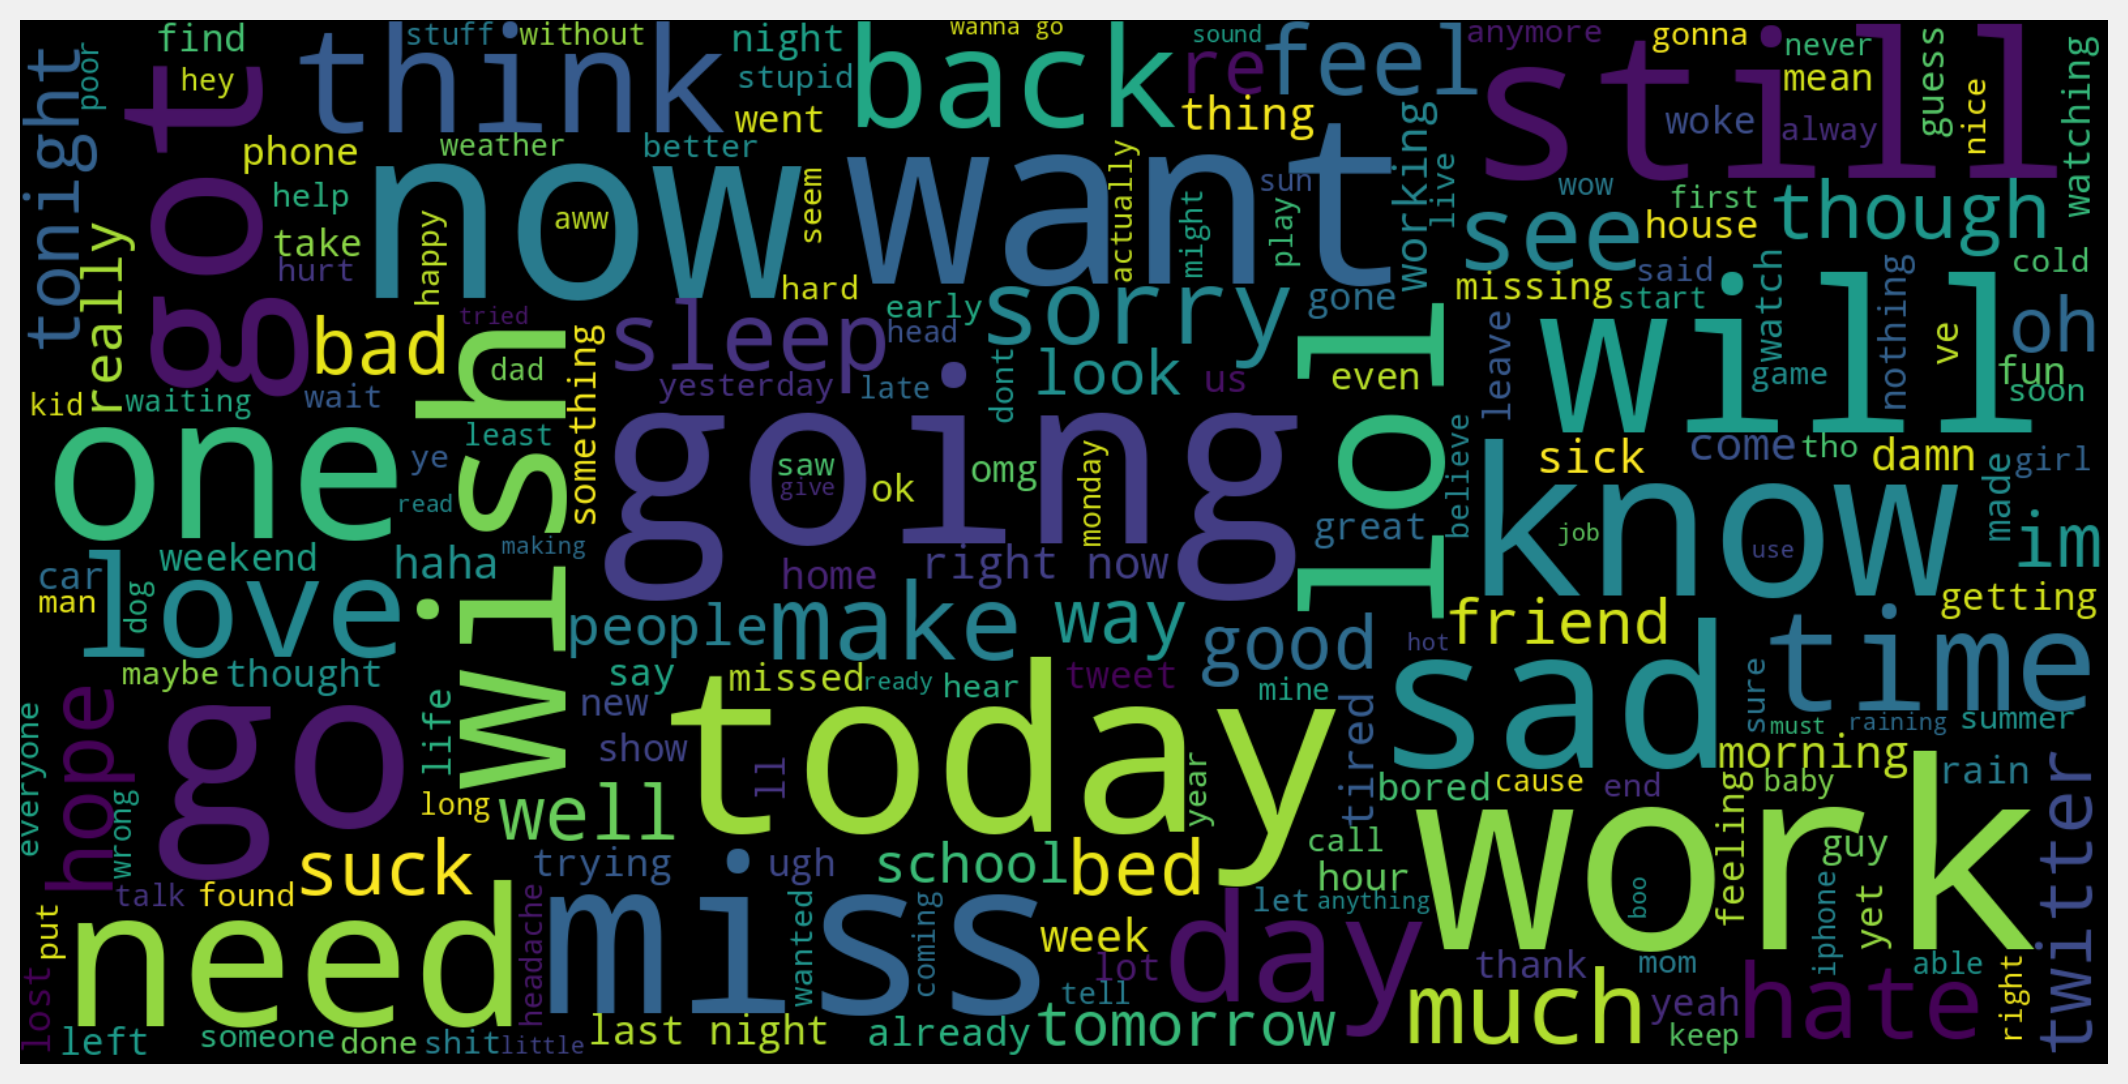

In [99]:
neg_tweets = my_df[my_df.target == 0]
neg_string = []
for t in neg_tweets.text:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

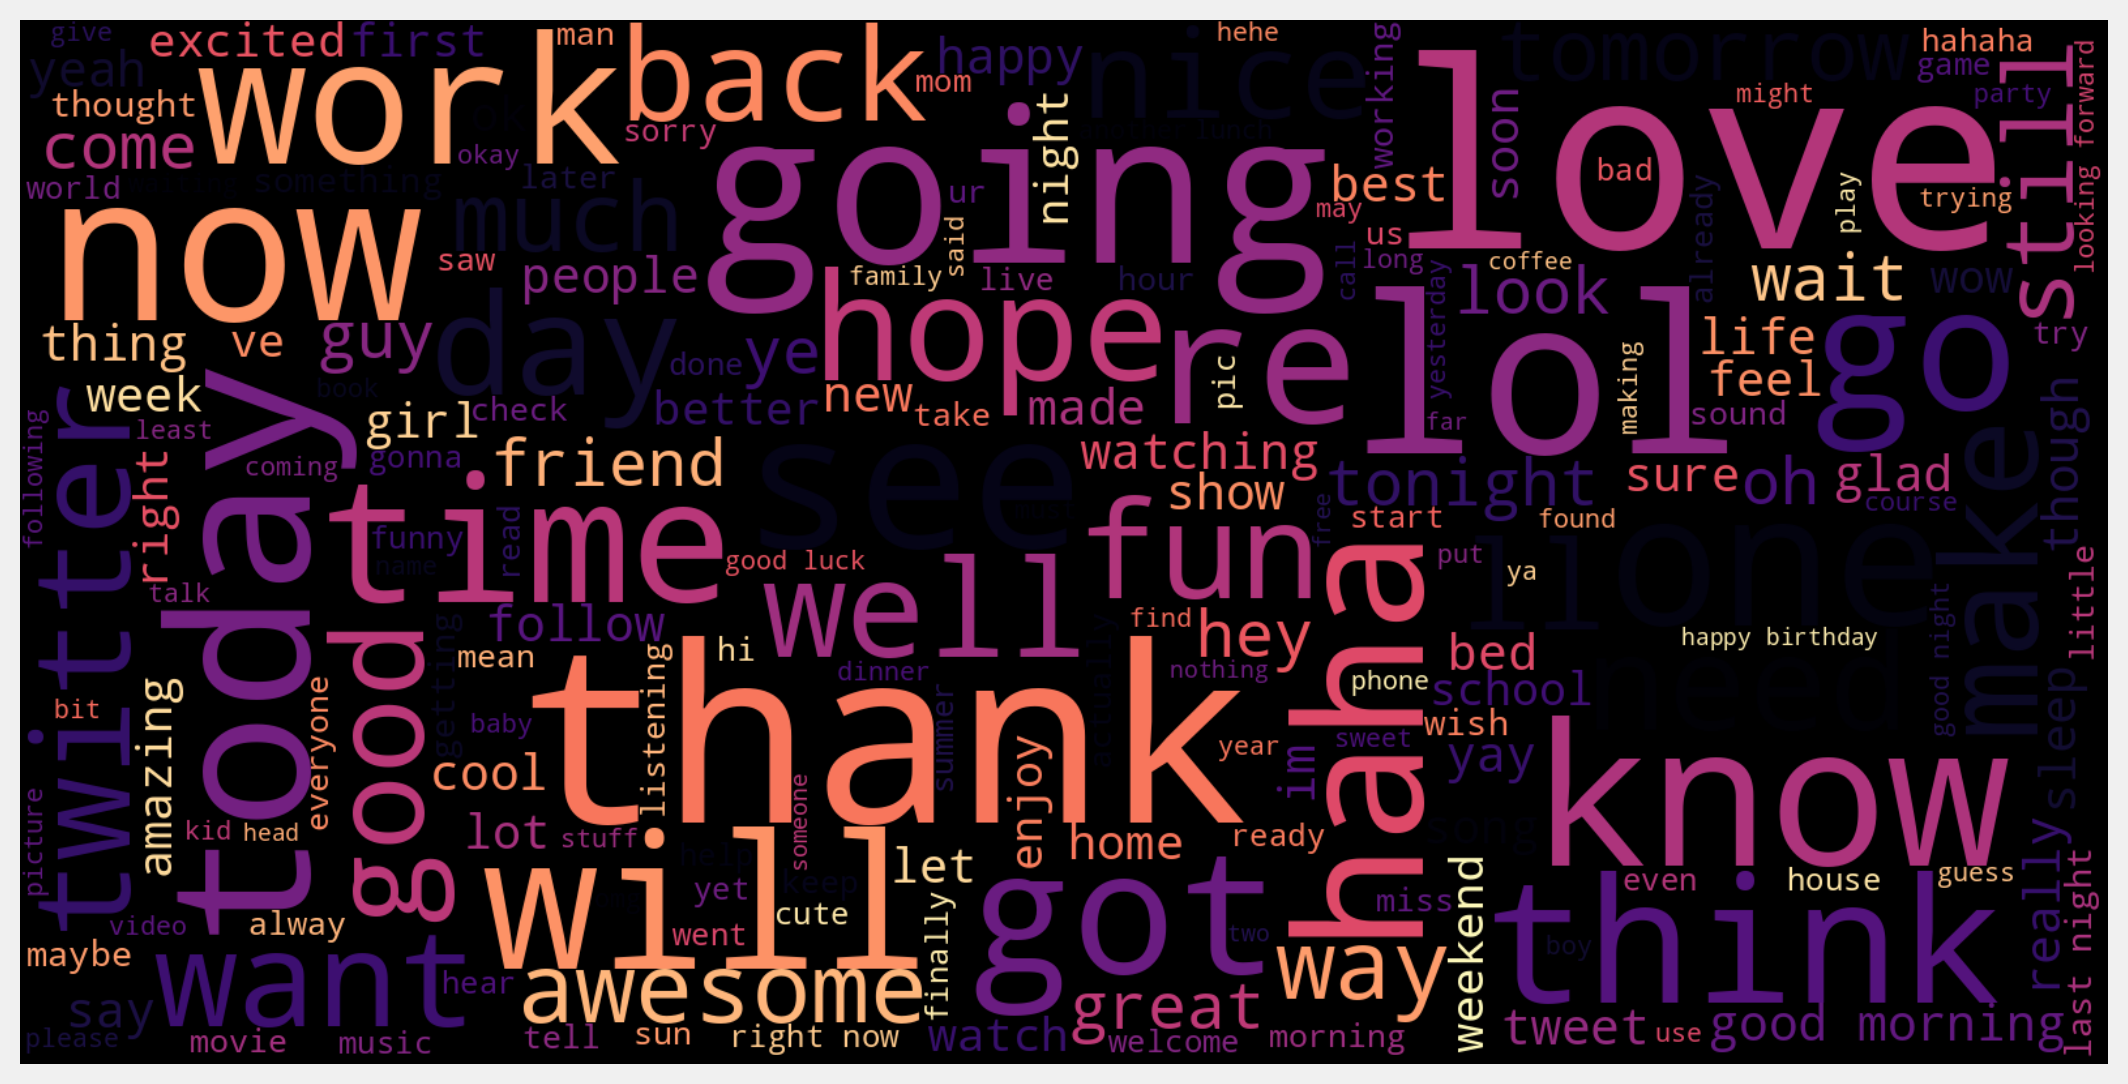

In [100]:
pos_tweets = my_df[my_df.target == 1]
pos_string = []
for t in pos_tweets.text:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='magma').generate(pos_string)
plt.figure(figsize=(12,10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.show()

Implementing Sentiment Analysis with Pyspark on clean_tweet.csv

In [104]:

from pyspark.sql import SparkSession

spark = SparkSession.builder \
        .appName("myApp") \
        .config("spark.driver.memory", "10g") \
        .getOrCreate()

sc = spark.sparkContext
df = spark.read.format('com.databricks.spark.csv').options(header='true', inferschema='true').load('clean_tweet.csv')

In [105]:
type(df)

pyspark.sql.dataframe.DataFrame

In [106]:
df.show(5)

+---+--------------------+------+
|_c0|                text|target|
+---+--------------------+------+
|  0|awww that bummer ...|     0|
|  1|is upset that he ...|     0|
|  2|dived many times ...|     0|
|  3|my whole body fee...|     0|
|  4|no it not behavin...|     0|
+---+--------------------+------+
only showing top 5 rows



In [107]:
df = df.dropna()

In [108]:
df.count()

1596041

In [114]:
(train_set, test_set) = df.randomSplit([0.90, 0.1], seed = 2000)

In [115]:
from pyspark.ml.feature import HashingTF, IDF, Tokenizer, CountVectorizer
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator

HashingTF + IDF + Logistic Regression

In [118]:
from pyspark.ml.feature import HashingTF, IDF, Tokenizer
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline
from pyspark.ml.linalg import Vector

# Train the model using the entire dataset
tokenizer = Tokenizer(inputCol="text", outputCol="words")
hashtf = HashingTF(numFeatures=2**16, inputCol="words", outputCol='tf')
idf = IDF(inputCol='tf', outputCol="features", minDocFreq=5)
label_stringIdx = StringIndexer(inputCol = "target", outputCol = "label")
pipeline = Pipeline(stages=[tokenizer, hashtf, idf, label_stringIdx])
pipelineFit = pipeline.fit(train_set)
train_df = pipelineFit.transform(train_set)
test_df = pipelineFit.transform(test_set)

# Train a logistic regression model
from pyspark.ml.classification import LogisticRegression
lr1 = LogisticRegression(maxIter=100)
lrModel1 = lr1.fit(train_df)

In [119]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics

# Compute predictions and convert to RDD
predictions = lrModel1.transform(test_df)
predictions_rdd = predictions.select(['prediction', 'label']).rdd

# Compute binary classification evaluation metrics
evaluator = BinaryClassificationEvaluator(rawPredictionCol='rawPrediction')
auc = evaluator.evaluate(predictions)

# Compute multiclass classification evaluation metrics
evaluator = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='label', metricName='f1')
f1_score = evaluator.evaluate(predictions)

# Compute confusion matrix
metrics = MulticlassMetrics(predictions_rdd)
confusion_matrix = metrics.confusionMatrix().toArray()

print('F1 Score: {:.4f}'.format(f1_score))
print('Area Under the Curve (AUC): {:.4f}'.format(auc))
print('Confusion Matrix:')
print(confusion_matrix)
accuracy = evaluator.evaluate(predictions)
print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


F1 Score: 0.7889
Area Under the Curve (AUC): 0.8586
Confusion Matrix:
[[61784. 17927.]
 [15692. 63896.]]
Accuracy: 0.7889173522751028


In [120]:

# Create a function to predict the sentiment of a new sentence
def predict_sentiment(sentence: str) -> str:
    # Create a dataframe with the new sentence
    new_df = spark.createDataFrame([(sentence,)], ["text"])
    
    # Convert the text input into a feature vector
    new_df = pipelineFit.transform(new_df)
    features = new_df.select("features").head()[0]
    
    # Predict the sentiment of the new sentence
    prediction = lrModel1.predict(features)
    
    # Convert the prediction into a readable sentiment label
    return "Positive" if prediction == 1.0 else "Negative"

# Test the function
print(predict_sentiment("I love this product!")) # should print "Positive"
print(predict_sentiment("Rahul is a sad today")) # should print "Negative"


Positive
Negative


CountVectorizer + IDF + Logistic Regression

In [130]:
from pyspark.ml.feature import CountVectorizer

tokenizer = Tokenizer(inputCol="text", outputCol="words")
cv = CountVectorizer(vocabSize=2**16, inputCol="words", outputCol='cv')
idf = IDF(inputCol='cv', outputCol="features", minDocFreq=5) #minDocFreq: remove sparse terms
label_stringIdx = StringIndexer(inputCol = "target", outputCol = "label")
lr = LogisticRegression(maxIter=100)
pipeline = Pipeline(stages=[tokenizer, cv, idf, label_stringIdx, lr])
pipelineFit = pipeline.fit(train_set)
predictions = pipelineFit.transform(test_set)
accuracy = predictions.filter(predictions.label == predictions.prediction).count() / float(test_set.count())
roc_auc = evaluator.evaluate(predictions)
print (accuracy)
print (roc_auc)


0.7946816991945963
0.7946361396002097


N-gram Implementation

In [131]:
from pyspark.ml.feature import NGram, VectorAssembler

def build_ngrams_wocs(inputCol=["text","target"], n=3):
    tokenizer = [Tokenizer(inputCol="text", outputCol="words")]
    ngrams = [
        NGram(n=i, inputCol="words", outputCol="{0}_grams".format(i))
        for i in range(1, n + 1)
    ]

    cv = [
        CountVectorizer(vocabSize=5460,inputCol="{0}_grams".format(i),
            outputCol="{0}_tf".format(i))
        for i in range(1, n + 1)
    ]
    idf = [IDF(inputCol="{0}_tf".format(i), outputCol="{0}_tfidf".format(i), minDocFreq=5) for i in range(1, n + 1)]

    assembler = [VectorAssembler(
        inputCols=["{0}_tfidf".format(i) for i in range(1, n + 1)],
        outputCol="features"
    )]
    label_stringIdx = [StringIndexer(inputCol = "target", outputCol = "label")]
    lr = [LogisticRegression(maxIter=100)]
    return Pipeline(stages=tokenizer + ngrams + cv + idf+ assembler + label_stringIdx+lr)

In [132]:
trigramwocs_pipelineFit = build_ngrams_wocs().fit(train_set)
predictions_wocs = trigramwocs_pipelineFit.transform(test_set)
accuracy_wocs = predictions_wocs.filter(predictions_wocs.label == predictions_wocs.prediction).count() / float(test_set.count())
roc_auc_wocs = evaluator.evaluate(predictions_wocs)
print (accuracy_wocs)
print (roc_auc_wocs)

0.809885812214766
0.80979097961476


In [137]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics

# Compute F1 score
evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='f1')
f1_score_wocs = evaluator.evaluate(predictions_wocs)
print('F1 Score (w/ Trigram and WOCS):', f1_score_wocs)

# Compute confusion matrix
predictions_rdd = predictions_wocs.select(['prediction', 'label']).rdd
metrics = MulticlassMetrics(predictions_rdd)
confusion_matrix_wocs = metrics.confusionMatrix().toArray()
print('Confusion Matrix (w/ Trigram and WOCS):\n', confusion_matrix_wocs)


F1 Score (w/ Trigram and WOCS): 0.80979097961476
Confusion Matrix (w/ Trigram and WOCS):
 [[62759. 16952.]
 [13333. 66255.]]


### Test Cases

In [135]:
#@title Default title text
# Sample test sentences
test_sentences = [
    "This movie was fantastic, I loved it!",
    "The acting was terrible and the plot was nonsensical.",
    "The special effects were incredible but the pacing was too slow.",
    "it was a waste of time and money.",
    "The story was engaging and the characters were well-developed.",
]

# Create DataFrame from test sentences
test_df = spark.createDataFrame([(s,) for s in test_sentences], ["text"])

# Apply the trained pipeline to the test DataFrame
predictions = trigramwocs_pipelineFit.transform(test_df)


predictions.select("text", "prediction", "probability").show(truncate=False)


+----------------------------------------------------------------+----------+----------------------------------------+
|text                                                            |prediction|probability                             |
+----------------------------------------------------------------+----------+----------------------------------------+
|This movie was fantastic, I loved it!                           |1.0       |[0.3442552563451219,0.6557447436548781] |
|The acting was terrible and the plot was nonsensical.           |0.0       |[0.8993088517288437,0.10069114827115633]|
|The special effects were incredible but the pacing was too slow.|1.0       |[0.4994145134846902,0.5005854865153099] |
|it was a waste of time and money.                               |0.0       |[0.5809964431849753,0.41900355681502466]|
|The story was engaging and the characters were well-developed.  |1.0       |[0.3337747019206561,0.6662252980793439] |
+-----------------------------------------------